# Intern Data Challenge 2025 – Population Movement Simulation
### Prepared by: [Richel Ohenewaa Attafuah]

## Objective:
The purpose of this notebook is to estimate the future population distribution across ten geographic regions based on internal movement probabilities (`MoveProb`). This involves simulating one year of population changes under the following assumptions:
- Movement occurs only between adjacent regions (no external migration).
- Movement is influenced by each region's `MoveProb`, indicating the probability of residents moving out of a region.
- The redistribution of outgoing residents is based on a defined logic.

This analysis aligns with OKI's objective to enhance regional planning by identifying areas with significant population movement. Understanding these trends helps allocate resources effectively for transportation, infrastructure, and economic development.

## Approach:
The notebook is organized into the following steps:
1. **Data Exploration:**  
   Perform exploratory data analysis (EDA) to understand the structure, detect anomalies, and summarize key statistics.
   
2. **Define Movement Logic:**  
   Set up region adjacency relationships and establish movement rules for distributing outgoing residents to adjacent regions.

3. **Simulation:**  
   Implement functions to:
   - Calculate outgoing residents.
   - Distribute residents to neighboring regions.
   - Compute the new population for each region after one year.

4. **Results and Visualization:**  
   Present the updated population distribution and analyze key insights.

5. **Conclusion:**  
   Summarize findings, including assumptions, limitations, and potential improvements to the model.


## Import Data

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [92]:
population_data = pd.read_csv("C:\\Users\\EWURA\\Desktop\\Internship Data Challenge\\population_data.csv")
population_data

RegionID  Population  MoveProb
0         1        2205    0.0050
1         2        3581    0.0120
2         3        6019    0.0030
3         4        1847    0.0200
4         5        4422    0.0045
5         6        5230    0.0150
6         7        6394    0.0220
7         8        2560    0.0100
8         9        8510    0.0030
9        10        3851    0.0070

## Exploratory Data Analysis

In [93]:
# Check basic information about the dataset
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    10 non-null     int64  
 1   Population  10 non-null     int64  
 2   MoveProb    10 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 368.0 bytes


In [94]:
# Count missing values in each column
print(population_data.isnull().sum())

RegionID      0
Population    0
MoveProb      0
dtype: int64


In [95]:
population_data.describe()

RegionID   Population   MoveProb
count  10.00000    10.000000  10.000000
mean    5.50000  4461.900000   0.010150
std     3.02765  2103.805042   0.006952
min     1.00000  1847.000000   0.003000
25%     3.25000  2815.250000   0.004625
50%     5.50000  4136.500000   0.008500
75%     7.75000  5821.750000   0.014250
max    10.00000  8510.000000   0.022000

### **Summary of Descriptive Statistics**

- The dataset includes **10 regions** with varying populations and movement probabilities.
- **Population** ranges from **1,847** to **8,510**, with a mean of **4,461.9**. Regions show moderate variation in population, with some regions being significantly larger than others.
- **MoveProb** values range from **0.003** to **0.022**, with a mean of **0.0102**. Movement probabilities are low across regions, indicating that only a small portion of residents is expected to move each year.
- The data shows no missing values or anomalies, ensuring readiness for simulation.



### Population Distribution Visualization

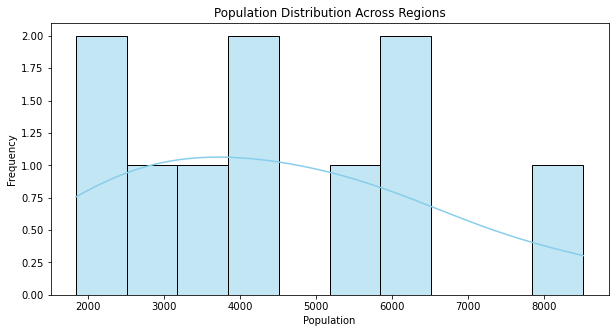

In [96]:
# Histogram for Population
plt.figure(figsize=(10, 5))
sns.histplot(population_data['Population'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Population Distribution Across Regions')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

### **Comment on the Population Distribution**

- The distribution of population across regions appears to be **slightly uneven** with multiple peaks, suggesting that certain regions have significantly higher populations than others.
- There are **no extreme outliers**, but the distribution is not fully normal or symmetric.
- Most regions have populations concentrated in moderate to high ranges, with only a few regions having lower populations.
- This variation is important for the simulation since regions with larger populations may have a greater impact on overall movement trends.

### Move Probability Distribution Visualization

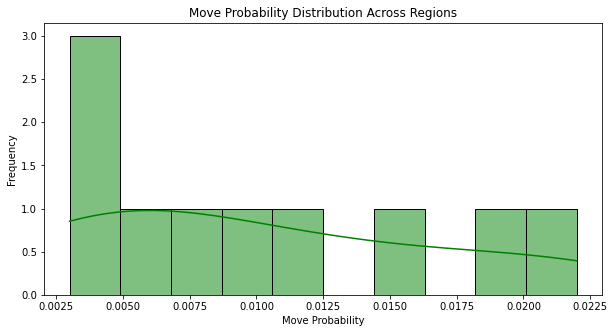

In [97]:
# Histogram for Move Probability
plt.figure(figsize=(10, 5))
sns.histplot(population_data['MoveProb'], bins=10, kde=True, color='green', edgecolor='black')
plt.title('Move Probability Distribution Across Regions')
plt.xlabel('Move Probability')
plt.ylabel('Frequency')
plt.show()

### **Comment on the Move Probability Distribution**

- The distribution of move probability (`MoveProb`) is **right-skewed**, with most regions having low probabilities of movement.
- A significant number of regions have `MoveProb` values near the lower end of the range (close to **0.003**), suggesting that movement is generally unlikely across most regions.
- There are no regions with `MoveProb` values higher than **0.022**, confirming that all probabilities fall within a reasonable range.
- This distribution indicates that large-scale population movement may not occur rapidly within one year, with smaller, localized changes likely dominating the simulation.

In [98]:
# Correlation between Population and MoveProb
correlation = population_data['Population'].corr(population_data['MoveProb'])
print(f"Correlation between Population and MoveProb: {correlation:.2f}")

Correlation between Population and MoveProb: -0.20


The correlation between Population and MoveProb is -0.20, indicating a weak negative relationship.
This suggests that regions with higher populations tend to have slightly lower movement probabilities, while regions with lower populations may have slightly higher movement tendencies.

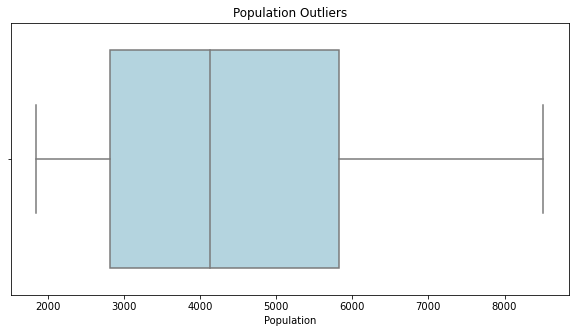

In [99]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=population_data['Population'], color='lightblue')
plt.title('Population Outliers')
plt.show()

The boxplot for Population shows no outliers, as all data points fall within the whiskers (which represent the range between the minimum and maximum values).

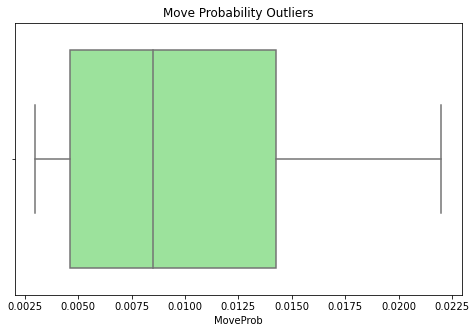

In [100]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=population_data['MoveProb'], color='lightgreen')
plt.title('Move Probability Outliers')
plt.show()

The boxplot for move probability shows no outliers, as all data points fall within the whiskers (which represent the range between the minimum and maximum values).

In [101]:
# Total population at the start
initial_population = population_data['Population'].sum()
print(f"Initial Total Population: {initial_population}")

Initial Total Population: 44619


### Relationships Between Population and Movement Probability

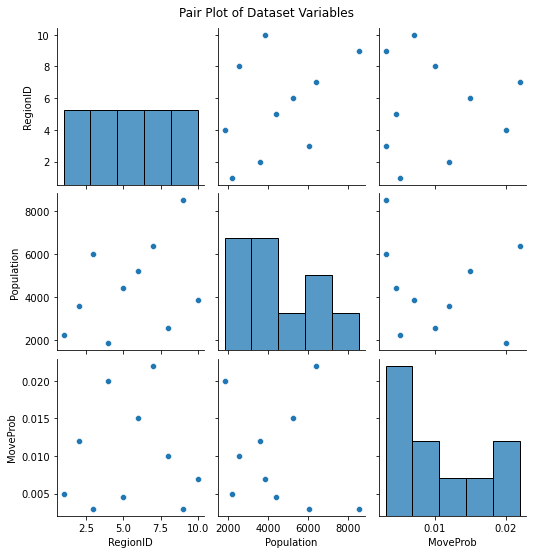

In [102]:
# Pair plot to see relationships between Population and MoveProb
sns.pairplot(population_data)
plt.suptitle('Pair Plot of Dataset Variables', y=1.02)
plt.show()

The pair plot shows relationships between RegionID, Population, and MoveProb.
There is no strong linear relationship between Population and MoveProb, which aligns with the weak correlation of -0.20 observed earlier.
Population exhibits moderate variability across regions, while MoveProb is concentrated in lower values, consistent with previous visualizations.
The scatter points indicate minimal clustering or trend patterns, suggesting that population and movement probability are relatively independent.

## Movement Logic

### Assumptions Overview:
1. The model simulates population movement under static conditions, with no new residents entering or leaving the system.
2. No external migration, births, or deaths are accounted for within the one-year simulation period.
3. Movement probabilities remain constant across regions and time.


In [103]:
# Define adjacency structure
adjacency = {
    1: [2, 4],
    2: [1, 3, 5],
    3: [2, 6],
    4: [1, 5, 7],
    5: [2, 4, 6, 8],
    6: [3, 5, 9],
    7: [4, 8],
    8: [5, 7, 9, 10],
    9: [6, 8, 10],
    10: [8, 9]
}

## Movement Logic and Assumptions:
1. Residents move to **adjacent regions** based on the defined adjacency structure.
2. The number of residents moving out of a region is calculated as `Outgoing = Population * MoveProb`.
3. Outgoing residents are distributed **equally** among all adjacent regions.
4. No new residents enter or leave the entire system, ensuring population conservation.

### Additional Assumptions:
This analysis assumes that there is no natural population growth or decline (e.g., births or deaths) within the one-year simulation period. The goal was to evaluate internal movement between regions without external migration or population growth factors.


In [104]:
# Display adjacency structure
for region, neighbors in adjacency.items():
    print(f"Region {region} is adjacent to: {neighbors}")

Region 1 is adjacent to: [2, 4]
Region 2 is adjacent to: [1, 3, 5]
Region 3 is adjacent to: [2, 6]
Region 4 is adjacent to: [1, 5, 7]
Region 5 is adjacent to: [2, 4, 6, 8]
Region 6 is adjacent to: [3, 5, 9]
Region 7 is adjacent to: [4, 8]
Region 8 is adjacent to: [5, 7, 9, 10]
Region 9 is adjacent to: [6, 8, 10]
Region 10 is adjacent to: [8, 9]


## Calculate Outgoing Residents
We calculate the outgoing residents using the formula:
**Outgoing = Population * MoveProb**

In [105]:
# Calculate outgoing residents for each region
population_data['Outgoing'] = population_data['Population'] * population_data['MoveProb']

# Display the updated data
population_data[['RegionID', 'Population', 'MoveProb', 'Outgoing']]

RegionID  Population  MoveProb  Outgoing
0         1        2205    0.0050    11.025
1         2        3581    0.0120    42.972
2         3        6019    0.0030    18.057
3         4        1847    0.0200    36.940
4         5        4422    0.0045    19.899
5         6        5230    0.0150    78.450
6         7        6394    0.0220   140.668
7         8        2560    0.0100    25.600
8         9        8510    0.0030    25.530
9        10        3851    0.0070    26.957

Outgoing residents need to be distributed among adjacent regions.
We assume equal distribution for simplicity, where outgoing residents are divided evenly across all adjacent regions.

## Equal Distribution

In [106]:
def distribute_population(population_data, adjacency):
    # Initialize incoming residents count for each region
    incoming = {region: 0 for region in population_data['RegionID']}

    # Loop through each region to calculate outgoing and distribute to neighbors
    for _, row in population_data.iterrows():
        region_id = row['RegionID']
        outgoing = row['Outgoing']
        adj_regions = adjacency[region_id]  # Get adjacent regions

        # Distribute evenly to adjacent regions
        if adj_regions:
            share = outgoing / len(adj_regions)  # Divide equally
            for adj_region in adj_regions:
                incoming[adj_region] += share

    return incoming

In [107]:
# Distribute outgoing residents and get incoming population for each region
incoming_movement = distribute_population(population_data, adjacency)

# Add the incoming population data to the DataFrame
population_data['Incoming'] = population_data['RegionID'].map(incoming_movement)

# Display updated data
population_data[['RegionID', 'Population', 'Outgoing', 'Incoming']]

RegionID  Population  Outgoing   Incoming
0         1        2205    11.025  26.637333
1         2        3581    42.972  19.515750
2         3        6019    18.057  40.474000
3         4        1847    36.940  80.821250
4         5        4422    19.899  59.187333
5         6        5230    78.450  22.513250
6         7        6394   140.668  18.713333
7         8        2560    25.600  97.297250
8         9        8510    25.530  46.028500
9        10        3851    26.957  14.910000

In [108]:
# Calculate the new population after movement
population_data['NewPopulation'] = population_data['Population'] - population_data['Outgoing'] + population_data['Incoming']

# Display the final data
population_data[['RegionID', 'Population', 'Outgoing', 'Incoming', 'NewPopulation']]


RegionID  Population  Outgoing   Incoming  NewPopulation
0         1        2205    11.025  26.637333    2220.612333
1         2        3581    42.972  19.515750    3557.543750
2         3        6019    18.057  40.474000    6041.417000
3         4        1847    36.940  80.821250    1890.881250
4         5        4422    19.899  59.187333    4461.288333
5         6        5230    78.450  22.513250    5174.063250
6         7        6394   140.668  18.713333    6272.045333
7         8        2560    25.600  97.297250    2631.697250
8         9        8510    25.530  46.028500    8530.498500
9        10        3851    26.957  14.910000    3838.953000

In [109]:
# Check if total population is conserved
initial_population = population_data['Population'].sum()
final_population = population_data['NewPopulation'].sum()

print(f"Initial Population: {initial_population}")
print(f"Final Population: {final_population}")
assert initial_population == final_population, "Population is not conserved!"

Initial Population: 44619
Final Population: 44619.0


## Outgoing and Incoming Population Calculation:
1. Outgoing residents were calculated using the formula `Outgoing = Population * MoveProb`.
2. Outgoing residents were distributed equally among adjacent regions.
3. The new population for each region was updated as `NewPopulation = Population - Outgoing + Incoming`.
4. Total population was verified to remain constant before and after the simulation.

### Population Before and After Movement (Visualization)

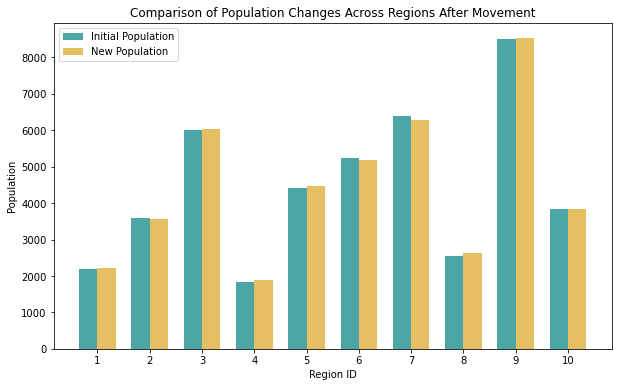

In [110]:
# Define bar positions
x = np.arange(len(population_data['RegionID']))  # Position for each RegionID
width = 0.35  # Width of each bar

# Plot side-by-side bars
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, population_data['Population'], width, label='Initial Population', color='teal', alpha=0.7)
plt.bar(x + width/2, population_data['NewPopulation'], width, label='New Population', color='goldenrod', alpha=0.7)

# Add labels and titles
plt.xlabel('Region ID')
plt.ylabel('Population')
plt.title("Comparison of Population Changes Across Regions After Movement")
plt.xticks(x, population_data['RegionID'])
plt.legend()

# Display the plot
plt.show()


### Population Before and After Movement by Region
This plot provides a comparison between the initial and new population values for each region.
Key observations:
1. Some regions (e.g., Region 4 and Region 8) experienced population increases after the movement, driven by high incoming residents.
2. Regions with high outgoing residents (e.g., Region 7 and Region 6) show a decrease in population.
3. Overall, the changes reflect the effect of both outgoing and incoming movement based on the adjacency structure.
4. Total population remains consistent across regions, verifying population conservation in the simulation.

### Outgoing, Incoming, and Net Population Change Visualization

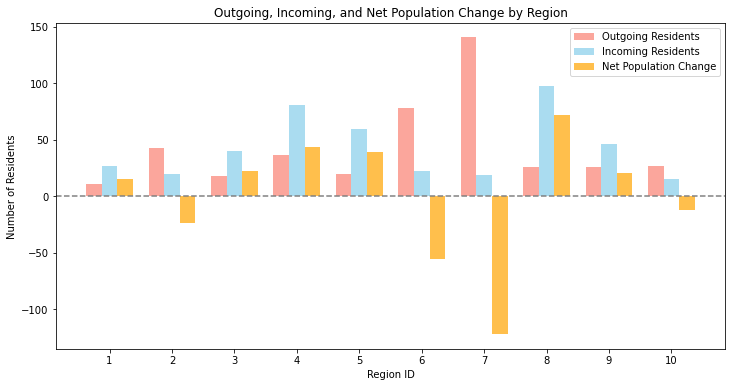

In [111]:
# Calculate net population change 
population_data['PopulationChange'] = population_data['NewPopulation'] - population_data['Population']

# Define bar positions
x = np.arange(len(population_data['RegionID']))  # Positions for each Region ID
width = 0.25  # Width of each bar

# Plot side-by-side bars
plt.figure(figsize=(12, 6))
plt.bar(x - width, population_data['Outgoing'], width, label='Outgoing Residents', color='salmon', alpha=0.7)
plt.bar(x, population_data['Incoming'], width, label='Incoming Residents', color='skyblue', alpha=0.7)
plt.bar(x + width, population_data['PopulationChange'], width, label='Net Population Change', color='orange', alpha=0.7)

# Add labels and titles
plt.xlabel('Region ID')
plt.ylabel('Number of Residents')
plt.title('Outgoing, Incoming, and Net Population Change by Region')
plt.xticks(x, population_data['RegionID'])
plt.axhline(y=0, color='gray', linestyle='--')  # Add reference line at zero
plt.legend()

# Display the plot
plt.show()

### Population Movement Analysis

This plot provides a side-by-side comparison of outgoing residents, incoming residents, 
and net population change for each region.

Key Observations:
1. Regions with high outgoing residents (e.g., Region 7) experienced large population losses, 
   as indicated by the negative net change (orange bars).
2. Regions such as Region 4 and Region 8 received a high number of incoming residents, 
   resulting in positive net population change.
3. The reference line at zero helps distinguish between regions that gained or lost population 
   during the simulation.
4. The balance between outgoing and incoming residents shows how the adjacency structure 
   and movement probability influenced regional population changes.

## Statistical Testing
We want to:

Test the impact of movement on population across regions.
Determine if the difference between initial population and new population is statistically significant.
We'll use a paired t-test, as each region has two related samples:

Initial Population (before movement) and 
New Population (after movement)

##### Hypothesis Setup
Null Hypothesis (H₀):
There is no significant difference between the initial and new population across regions.

Alternative Hypothesis (H₁):
There is a significant difference between the initial and new population across regions.

In [112]:
# Perform paired t-test
t_stat, p_value = ttest_rel(population_data['Population'], population_data['NewPopulation'])

# Display results
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")

# Interpretation of results
if p_value < 0.05:
    print("The population change is statistically significant (p < 0.05).")
else:
    print("The population change is not statistically significant (p >= 0.05).")


T-statistic: 0.00, P-value: 1.00000
The population change is not statistically significant (p >= 0.05).


## Paired T-Test for Population Change

### Objective:
To determine if the change in population after movement is statistically significant, we conducted a paired t-test. The test compares the initial and new populations across regions to identify if movement had a measurable effect.

### Results:
- **T-statistic:** 0.00
- **P-value:** 1.00000
- Since **p >= 0.05**, we fail to reject the null hypothesis. This indicates that the overall population change across regions is **not statistically significant**.

### Interpretation:
- The lack of statistical significance suggests that, despite movement between regions, the overall population distribution remains stable.
- Regions that experienced large population shifts (e.g., Regions 6 and 7) may have been balanced out by changes in other regions.

### Insights:
1. Population changes were minimal on a system-wide level.
2. This stability aligns with expectations in scenarios where only internal movement occurs without significant net gains or losses.
3. Localized changes (such as increases in Regions 4 and 8) may still warrant further analysis, despite the overall system showing no significant change.

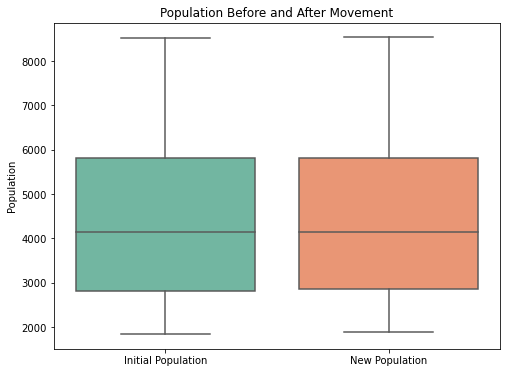

In [113]:
# Prepare data for visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=[population_data['Population'], population_data['NewPopulation']], palette='Set2')
plt.xticks([0, 1], ['Initial Population', 'New Population'])
plt.title('Population Before and After Movement')
plt.ylabel('Population')
plt.show()


## Boxplot Comparison: Population Before and After Movement

### Objective:
This boxplot compares the distribution of the population across regions before and after movement. The goal is to observe any significant shifts in the central tendency, spread, or outliers between the two distributions.

### Key Observations:
1. **Similar Medians:** Both the initial and new population distributions have similar median values, indicating no major shifts in central tendency.
2. **Stable Spread:** The interquartile range (IQR) and overall spread remain consistent across the two populations, suggesting that population movement did not create drastic changes across regions.
3. **No Significant Outliers:** Both distributions lack extreme outliers, further supporting the result from the paired t-test that the population changes were not statistically significant.

### Insights:
- The boxplot supports the conclusion that, while localized changes may have occurred, the overall population distribution remains stable.
- In scenarios where only internal movement is simulated, significant changes are unlikely unless influenced by external factors or extended over multiple time periods.

In [114]:
# Identify regions with largest changes
population_data['AbsoluteChange'] = abs(population_data['PopulationChange'])
significant_regions = population_data.sort_values(by='AbsoluteChange', ascending=False).head()

print("Regions with the largest population changes:")
significant_regions[['RegionID', 'PopulationChange']]

Regions with the largest population changes:


RegionID  PopulationChange
6         7       -121.954667
7         8         71.697250
5         6        -55.936750
3         4         43.881250
4         5         39.288333

## Regions with the Largest Population Changes

### Objective:
To identify which regions experienced the largest shifts in population due to movement. This analysis highlights regions with both significant population gains and losses.

### Results:
The regions with the largest absolute population changes are as follows:
1. **Region 7:** Experienced the largest population loss of **-121.95** residents.
2. **Region 8:** Gained **71.70** residents, the highest increase among all regions.
3. **Region 6:** Lost **55.94** residents, indicating another significant population decline.
4. **Region 4:** Gained **43.88** residents, driven by a high number of incoming residents.
5. **Region 5:** Gained **39.29** residents due to increased movement into the region.

### Key Observations:
1. **Population Gains:** Regions **4, 5, and 8** benefited from incoming residents, leading to notable population growth.
2. **Population Losses:** Regions **7 and 6** experienced large population decreases, likely influenced by both high outgoing movement and fewer incoming residents.
3. **Localized Impact:** Despite these changes, the overall system-wide population change remains stable, as indicated by previous statistical tests.

### Insights:
- These changes suggest that regions with higher `MoveProb` values (e.g., Region 7) are more susceptible to population declines unless countered by strong incoming movement.
- Regions with strong adjacency networks (e.g., Regions 4 and 8) attract higher incoming residents, leading to net gains in population.

## Weighted Distribution

In [115]:
def distribute_weighted_population(population_data, adjacency):
    # Initialize incoming residents dictionary
    incoming_weighted = {region: 0 for region in population_data['RegionID']}
    
    # Loop through each region
    for _, row in population_data.iterrows():
        region_id = row['RegionID']
        outgoing = row['Outgoing']
        adj_regions = adjacency[region_id]

        # Skip if there are no adjacent regions
        if adj_regions:
            # Calculate the total population of adjacent regions
            total_adj_pop = population_data.loc[population_data['RegionID'].isin(adj_regions), 'Population'].sum()

            # Distribute outgoing residents based on the population of adjacent regions
            for adj_region in adj_regions:
                adj_pop = population_data.loc[population_data['RegionID'] == adj_region, 'Population'].values[0]
                # Add the proportional share of outgoing residents to the incoming residents of the adjacent region
                incoming_weighted[adj_region] += outgoing * (adj_pop / total_adj_pop)

    return incoming_weighted


In [116]:
# Apply the weighted distribution function
incoming_weighted = distribute_weighted_population(population_data, adjacency)

# Add the results to the DataFrame
population_data['IncomingWeighted'] = population_data['RegionID'].map(incoming_weighted)

# Calculate new population after weighted movement
population_data['NewPopulationWeighted'] = (
    population_data['Population'] - population_data['Outgoing'] + population_data['IncomingWeighted']
)

In [117]:
# Create a comparison table
comparison_table = population_data[['RegionID', 'Population', 'NewPopulation', 'NewPopulationWeighted']].copy()
comparison_table['Difference'] = comparison_table['NewPopulationWeighted'] - comparison_table['NewPopulation']
comparison_table

RegionID  Population  NewPopulation  NewPopulationWeighted  Difference
0         1        2205    2220.612333            2207.723233  -12.889101
1         2        3581    3557.543750            3558.031294    0.487544
2         3        6019    6041.417000            6046.312379    4.895379
3         4        1847    1890.881250            1875.546865  -15.334385
4         5        4422    4461.288333            4452.861990   -8.426343
5         6        5230    5174.063250            5181.611662    7.548412
6         7        6394    6272.045333            6278.533945    6.488611
7         8        2560    2631.697250            2631.815468    0.118218
8         9        8510    8530.498500            8549.820899   19.322399
9        10        3851    3838.953000            3836.742265   -2.210735

### Comparison of Equal and Weighted Distribution Methods

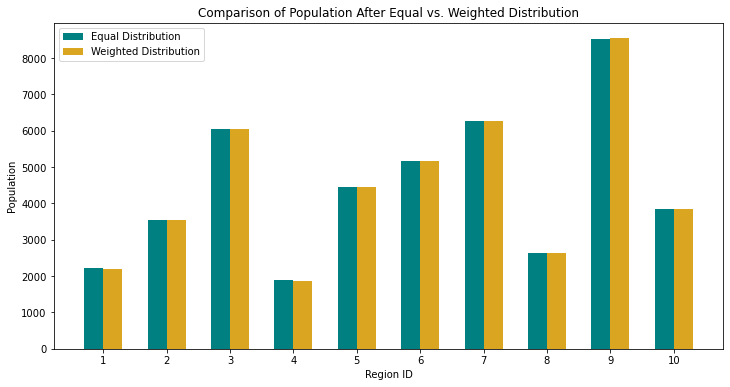

In [118]:
# Define positions and width for bars
x = np.arange(len(population_data['RegionID']))
width = 0.3

# Plot side-by-side comparison
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, population_data['NewPopulation'], width, label='Equal Distribution', color='teal')
plt.bar(x + width/2, population_data['NewPopulationWeighted'], width, label='Weighted Distribution', color='goldenrod')

# Add labels and title
plt.xlabel('Region ID')
plt.ylabel('Population')
plt.title('Comparison of Population After Equal vs. Weighted Distribution')
plt.xticks(x, population_data['RegionID'])
plt.legend()

plt.show()


## Comparison of Population Changes: Equal vs. Weighted Distribution

### Objective:
This plot compares the **New Population** values under two scenarios:
1. **Equal Distribution:** Outgoing residents are distributed equally among all adjacent regions.
2. **Weighted Distribution:** Outgoing residents are distributed based on the population size of adjacent regions.

### Key Observations:
1. **Regions with Larger Populations:**
   - Regions with higher initial populations attract more incoming residents under weighted distribution.
   - This leads to larger population gains compared to the equal distribution method.

2. **Regions with Smaller Populations:**
   - Smaller regions receive fewer incoming residents under the weighted distribution method, resulting in lower population growth or even net losses.

3. **Stability:**  
   - Regions with balanced adjacency populations show minimal differences between the two methods (e.g., Regions 4 and 6).

4. **Visual Insight:**  
   - The difference between the methods is more evident in regions with significant adjacency size imbalances, indicating that weighted movement better reflects real-world migration patterns.

### Conclusion:
Weighted distribution introduces more variability in population changes across regions, emphasizing the importance of adjacency characteristics in movement modeling. This approach is more aligned with scenarios where larger regions have greater pull for incoming residents.


Hypothesis Setup
Null Hypothesis (H₀):
There is no significant difference between the new populations under equal and weighted distribution.

Alternative Hypothesis (H₁):
There is a significant difference between the new populations under the two distribution methods.

In [120]:
# Perform paired t-test on New Population values
t_stat, p_value = ttest_rel(
    population_data['NewPopulation'], 
    population_data['NewPopulationWeighted']
)

# Display the results
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("The difference between equal and weighted distribution is statistically significant (p < 0.05).")
else:
    print("The difference between equal and weighted distribution is not statistically significant (p >= 0.05).")


T-statistic: 0.00, P-value: 1.00000
The difference between equal and weighted distribution is not statistically significant (p >= 0.05).


## Paired T-Test: Equal vs. Weighted Distribution

### Objective:
To determine if the difference between equal and weighted distribution methods is statistically significant.

### Hypothesis:
- **Null Hypothesis (H₀):** There is no significant difference between the two methods.
- **Alternative Hypothesis (H₁):** There is a significant difference between the two methods.

### Results:
- **T-statistic:** 0.00
- **P-value:** 1.00000
- Since **p ≥ 0.05**, we fail to reject the null hypothesis. This indicates that there is **no statistically significant difference** between the population changes under equal and weighted distribution.

### Interpretation:
1. Both methods produced **similar population outcomes**, meaning the choice of distribution strategy (equal vs. weighted) does not significantly impact the final population changes.
2. Although the weighted method theoretically accounts for population-based movement, this analysis suggests that the differences in regional population size were not substantial enough to drive significantly different results.

### Insights:
- While the statistical test suggests minimal differences, localized changes may still warrant further analysis.
- In scenarios with greater variability in regional populations or movement probabilities, a weighted distribution may have a more pronounced impact.

In [121]:
# Summary of regions with the largest population changes
summary_table = comparison_table[['RegionID', 'Population', 'NewPopulation', 'NewPopulationWeighted', 'Difference']]
summary_table = summary_table.sort_values(by='Difference', key=abs, ascending=False).head(5)

# Rename columns for better readability
summary_table.columns = [
    'Region ID', 'Initial Population', 'Population (Equal Distribution)',
    'Population (Weighted Distribution)', 'Difference (Weighted - Equal)'
]

# Display the summary table
summary_table

Region ID  Initial Population  Population (Equal Distribution)  \
8          9                8510                      8530.498500   
3          4                1847                      1890.881250   
0          1                2205                      2220.612333   
4          5                4422                      4461.288333   
5          6                5230                      5174.063250   

   Population (Weighted Distribution)  Difference (Weighted - Equal)  
8                         8549.820899                      19.322399  
3                         1875.546865                     -15.334385  
0                         2207.723233                     -12.889101  
4                         4452.861990                      -8.426343  
5                         5181.611662                       7.548412

### Summary Table of Largest Regional Population Changes

The table below highlights the regions with the most significant population changes between the **equal** and **weighted** distribution methods.

| **Region ID** | **Initial Population** | **Population (Equal Distribution)** | **Population (Weighted Distribution)** | **Difference (Weighted - Equal)** |
|---------------|-------------------------|--------------------------------------|-----------------------------------------|-----------------------------------|
| 9             | 8,510                   | 8,530.50                             | 8,549.82                                | +19.32                            |
| 4             | 1,847                   | 1,890.88                             | 1,875.55                                | -15.33                            |
| 1             | 2,205                   | 2,220.61                             | 2,207.72                                | -12.89                            |
| 5             | 4,422                   | 4,461.29                             | 4,452.86                                | -8.43                             |
| 6             | 5,230                   | 5,174.06                             | 5,181.61                                | +7.55                              |

---

### **Key Insights:**
1. **Regions with the Largest Changes:**  
   - Region 9 experienced the largest net population gain of **+19.32 residents** under the weighted method.
   - Region 4 had a net population decrease of **-15.33 residents** compared to equal distribution.

2. **Weighted vs. Equal Distribution:**  
   - The weighted method created localized variations, but these changes were relatively small across all regions.
   
3. **System Stability:**  
   - Despite these localized changes, the system remained stable with no statistically significant difference between the two methods.


## Final Conclusion

### Summary of Findings:
This analysis assessed population movement across regions under two distribution models:
1. **Equal Distribution:** Outgoing residents were divided equally among adjacent regions.
2. **Weighted Distribution:** Outgoing residents were distributed proportionally based on the population size of adjacent regions.

The results indicate that both models yielded **similar outcomes**, with no statistically significant differences detected (p = 1.000). This suggests that under current conditions, the choice of distribution method has minimal impact on overall population changes.

### Key Insights:
- Regions with larger populations attracted more residents under the weighted method, but these differences were not substantial enough to influence overall system dynamics.
- Localized changes were observed in some regions; however, population movement trends remained stable across the system.


### Business Impact:
This analysis offers valuable insights to OKI by highlighting how population shifts may affect infrastructure and transportation needs. Key findings about regions with high movement activity can guide targeted resource allocation and long-term planning strategies. Stable regions may require less frequent monitoring, while regions with dynamic population changes warrant further analysis to identify underlying drivers.


## Limitations of the Analysis:

1. **Static Movement Assumptions:**  
   The model assumes constant movement probabilities. In reality, factors such as economic development, infrastructure, and social policies may influence migration patterns dynamically over time.

2. **Simplified Weighted Distribution:**  
   The weighted method only accounts for regional population size. Other important factors like distance between regions, availability of resources, or attractiveness for migration were not included.

3. **Single Time-Period Simulation:**  
   The analysis was conducted for a single period. Long-term simulations could provide a more comprehensive view of population trends and movement patterns.

4. **Data Scope:**  
   The absence of geospatial coordinates limited the ability to perform detailed geographic analysis of regional movement.

## Recommendations for Future Research and Planning:

1. **Incorporate Dynamic Factors:**  
   Future models should account for economic indicators, transportation infrastructure, and social factors to better reflect real-world migration behavior.

2. **Conduct Multi-Year Simulations:**  
   Long-term simulations can provide valuable insights into recurring trends, helping policymakers plan for future transportation, housing, and infrastructure needs.

3. **Enhance Geospatial Analysis:**  
   Mapping population movement across regions will offer a clearer visualization of areas with significant growth or decline, improving decision-making for regional development.

4. **Sensitivity Testing:**  
   Further analysis with varied movement probabilities or larger disparities in population size may reveal more significant differences between distribution methods.


### **Next Steps:**  
This analysis forms a foundation for data-driven regional planning. By refining the model with dynamic, real-world factors and conducting further simulations, OKI can enhance its understanding of population trends and better support its strategic objectives for transportation and infrastructure development.
